# Análise de texto de fontes desestruturadas e Web

## Aula 04

Neste aula iremos aprender como obter e analisar dados da Web (*World Wide Web*) utilizando bibliotecas Python.

<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/requests-sidebar.png">

A biblioteca utilizada será a **requests**, cujo lema é *HTTP for humans!* Nosso objetivo será entender como podemos requisitar estes recursos disponíveis na Web.

Para conhecer mais sobre ela, acesse https://requests.readthedocs.io/

## Instalando a biblioteca *requests*

Primeiro, vamos instalar a principal biblioteca da aula!

In [ ]:
!pip install requests

Caso a bibliteca instalada seja de uma versão anterior, podemos atualizar com:

In [ ]:
!pip install -U pip
!pip install -U requests

## Importando as bibliotecas necessárias

Agora, vamos importar as bibliotecas necessárias:

In [2]:
# para trabalhar com diretórios / sistema operacional
import os

# para nos comunicarmos com a Web
import requests

# para pegar o executável do Python
import sys

Caso obtenha algum erro, utilize o **!pip install** para instalar a biblioteca ausente!

Vamos conferir com qual versão da biblioteca **requests** estamos trabalhando?

In [3]:
print(requests.__version__)

2.28.2


Você também pode conferir de onde está executando o Python e qual a versão

In [4]:
print('Executável:')
print(sys.executable)

print('\nVersão do Python:')
print(sys.version)

Executável:
/opt/conda/bin/python

Versão do Python:
3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]


Vamos conferir em qual diretório iremos trabalhar (é o diretório do notebook)?

In [5]:
print('O seu notebook está na pasta:')
print(os.getcwd())

O seu notebook está na pasta:
/home/jovyan


## Validação de CEP!

É comum que exista a necessidade de comunicação entre aplicações. Isto é feito pela disponibilização de uma API (*Application Programming Interface - Interface de Programação de Aplicativos*).

Uma API atua como uma camada que provê **comunicação**, ou seja, espeficifa uma interface que outras aplicações devem utilizar caso queiram se comunicar, permitindo que diferentes sistemas conversem entre si sem precisar entender exatamente o que cada um faz.

Apesar do termos ser comumente utilizado em um contexto Web, nos computador as aplicações precisam conhecer a API do sistema operacional para solicitar recursos, e nós programadores precisamos conhecer a API do pandas, sklearn, matplotlib, etc. caso queiramos utilizar recursos destes pacotes no Python!

Como um primeiro exemplo, iremos utilizar a API do viacep para validar **CEP**s!  Abra o site https://viacep.com.br e veja como este webservice (https://pt.wikipedia.org/wiki/Web_service) é disponibilizado.

In [7]:
cep = '04546-042'

# Complete a URL
url_cep = f"https://viacep.com.br/ws/{cep}/piped/"

req = requests.get(url_cep)
req

<Response [200]>

Perceba, pela **rota** descrita na **URL**, que escolhemos o formato `piped`. Então, esperamos que as informações do CEP consultado volte como uma string separada por pipes `|`.


Com a requisição feita, vamos conferir o código de resposta:

In [12]:
req.status_code

200

O tipo de conteúdo retornado:

In [13]:
req.headers['content-type']

'text/plain; charset=utf-8'

Perceba que obtivemos `text/plain`, o que significa que a resposta veio como uma string, em codificação `utf-8` (exploraremos depois a codificação).

In [14]:
print('Texto de resposta:\n')
print(req.text)

Texto de resposta:

cep:04546-042|logradouro:Rua Quatá|complemento:de 251/252 a 449/450|bairro:Vila Olímpia|localidade:São Paulo|uf:SP|ibge:3550308|gia:1004|ddd:11|siafi:7107


E se fizermos a requisição de um CEP inválido?!

In [15]:
cep = '12345'
url_cep = f"https://viacep.com.br/ws/{cep}/piped/"
req = requests.get(url_cep)

req

<Response [400]>

Conferindo o código de resposta:

In [16]:
print('Código de status da resposta: {}'.format(req.status_code))

Código de status da resposta: 400


Iremos estudar nos próximos tópicos o significado do status de resposta. Por enquanto, você tem algum palpite sobre em quais situações ele pode ser útil?!

## Códigos de status de respostas HTTP


Quando solicitamos um recurso, quais são as respostas possíveis? É importante perceber que nem sempre o recurso solicitado estará disponível.

Vamos fazer uma requisição GET ao Google.

In [17]:
resposta = requests.get('http://www.google.com/')
resposta

<Response [200]>

Vamos conferir o código de resposta:

In [18]:
print('Código de status da resposta: {}'.format(resposta.status_code))

Código de status da resposta: 200


In [19]:
resposta.ok

True

Agora, vamos realizar uma consulta utilizando uma URL inexistente:

In [20]:
resposta = requests.get('http://www.google.com/abacadabra')
resposta

<Response [404]>

In [21]:
print('Código de status da resposta: {}'.format(resposta.status_code))

Código de status da resposta: 404


Perceba que temos um novo código `404` e que a requisição não está ok!

In [22]:
resposta.ok

False

E por último esta consulta retorna:

In [23]:
url = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula04/fatura.pdf'

resposta = requests.get(url)
resposta

<Response [403]>

Acesse https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status ou https://pt.wikipedia.org/wiki/Lista_de_códigos_de_estado_HTTP para ver mais informações sobre os códigos de status da resposta. Eles podem indicar desde um sucesso, recurso inexistente até uma ausência de permissão para acesso.

**Exercício 1** Crie um bloco de código (preferencialmente uma função) que consulte um CEP. Caso o CEP seja válido, imprima o endereço. Caso o CEP seja inválido, imprima a mensagem "*CEP inválido!*"

In [40]:
def consulta_cep(cep):
    url_cep = f"https://viacep.com.br/ws/{cep}/piped/"
    response = requests.get(url_cep)

    if not response.ok or response.status_code != 200:
        raise ValueError(f"Status code {response.status_code}")

    return dict(item.split(":") for item in response.text.split("|"))


In [41]:
consulta_cep('123')

ValueError: Status code 400

In [42]:
consulta_cep('01310100')

{'cep': '01310-100',
 'logradouro': 'Avenida Paulista',
 'complemento': 'de 612 a 1510 - lado par',
 'bairro': 'Bela Vista',
 'localidade': 'São Paulo',
 'uf': 'SP',
 'ibge': '3550308',
 'gia': '1004',
 'ddd': '11',
 'siafi': '7107'}

**Exercício 2** O que acontece caso pesquise algum CEP no formato válido, mas que seja um CEP inexistente? Altere sua função para considerar este caso

In [59]:
def consulta_cep(cep):
    url_cep = f"https://viacep.com.br/ws/{cep}/piped/"
    response = requests.get(url_cep)

    if not response.ok or response.status_code != 200:
        raise ValueError(f"Status code {response.status_code}")

    data = dict(item.split(":") for item in response.text.split("|"))

    if "erro" in data:
        raise ValueError("Invalid CEP")

    return data


In [60]:
consulta_cep('77777777')

ValueError: Invalid CEP

In [61]:
consulta_cep('1234')

ValueError: Status code 400

In [62]:
consulta_cep('05436100')

{'cep': '05436-100',
 'logradouro': 'Rua Gonçalo Afonso',
 'complemento': '',
 'bairro': 'Jardim das Bandeiras',
 'localidade': 'São Paulo',
 'uf': 'SP',
 'ibge': '3550308',
 'gia': '1004',
 'ddd': '11',
 'siafi': '7107'}

**Exercício 3**

- **a)**) Separe a string do endereço do exercício anterior em substrings, divindindo pelo *pipe* (barra vertical $\rightarrow$ |). Armazene o resultado em uma lista.
    
- **b)** Tente também separar o que é título (ex: `logradouro`) do que é conteúdo (ex:`Rua Gonçalo Afonso`). Armazene o resultado em um dicionário.

In [ ]:
# Seu código aqui

No exercício 3 o texto de retorno foi dividido utilizando o *pipe* (barra vertical $\rightarrow$ |) como referência. Entretanto, uma forma melhor seria utilizar a interface **JSON** do viacep!

Note que será alterada o final da URL:

In [63]:
cep = '05436100'
url = 'https://viacep.com.br/ws/{}/json/'.format(cep)

req = requests.get(url=url)

endereco = req.text

endereco

'{\n  "cep": "05436-100",\n  "logradouro": "Rua Gonçalo Afonso",\n  "complemento": "",\n  "bairro": "Jardim das Bandeiras",\n  "localidade": "São Paulo",\n  "uf": "SP",\n  "ibge": "3550308",\n  "gia": "1004",\n  "ddd": "11",\n  "siafi": "7107"\n}'

In [64]:
print(endereco)

{
  "cep": "05436-100",
  "logradouro": "Rua Gonçalo Afonso",
  "complemento": "",
  "bairro": "Jardim das Bandeiras",
  "localidade": "São Paulo",
  "uf": "SP",
  "ibge": "3550308",
  "gia": "1004",
  "ddd": "11",
  "siafi": "7107"
}


Vamos utilizar a biblioteca `json` para representar o endereço de forma estruturada:

In [65]:
import json

dicionario_endereco = json.loads(endereco)
dicionario_endereco

{'cep': '05436-100',
 'logradouro': 'Rua Gonçalo Afonso',
 'complemento': '',
 'bairro': 'Jardim das Bandeiras',
 'localidade': 'São Paulo',
 'uf': 'SP',
 'ibge': '3550308',
 'gia': '1004',
 'ddd': '11',
 'siafi': '7107'}

Podemos então utilizar o `dicionario_endereco` para acessar informações dos dados, utilizando **chave** para obter o **valor** armazenado. Veja com a chave **cep**:

In [66]:
dicionario_endereco['cep']

'05436-100'

**Exercício 4** Qual o código de resposta que identifica que houve **sucesso** na requisição GET?

R: 200

**Exercício 5** Qual a diferença entre os códigos de erro 401 e 403?

R: Significa que o servidor se recusa a disponibilizar o recurso para o cliente. No caso do erro 401, a identidade do cliente é desconhecida, já no 403, é desconhecida.

**Exercício 6** Crie um bloco de código que acessa uma URL, informa se houve sucesso ou trata os erros 404, 403 e 401, fornecendo mensagens adequadas.

In [67]:
def consulta_cep(cep):
    url_cep = f"https://viacep.com.br/ws/{cep}/piped/"
    response = requests.get(url_cep)

    STATUS_CODE_RESPONSE = {
        401: "Unauthrized",
        403: "Forbiden",
        404: "Invalid CEP",
    }

    if not response.ok:
        if response.status_code in STATUS_CODE_RESPONSE:
            raise ValueError(STATUS_CODE_RESPONSE)

    data = dict(item.split(":") for item in response.text.split("|"))

    if "erro" in data:
        raise ValueError(STATUS_CODE_RESPONSE[403])

    return data


## Internet Protocol address (IP)

Os seres humanos acessam informações on-line utilizando endereços como http://www.google.com. Para que os recursos sejam localizados, os navegadores da Web utilizam endereços de protocolo de internet (**IP**). A conversão de nomes de domínio em endereços de **IP** pode ser realizada utilizando um serviço **DNS** (*Domain Name System*).

Iremos conferir o endereço **IP** dos servidores que estamos consultando

In [68]:
gg = requests.get('https://google.com', stream=True)
gg.raw._connection.sock.getpeername()

('142.250.218.164', 443)

In [70]:
gg = requests.get('http://www.insper.edu.br/', stream=True)
gg.raw._connection.sock.getpeername()

('23.41.255.78', 443)

No próximo comando, iremos realizar um `ping`. O comando `ping` é uma ferramenta simples usada para testar a conectividade entre dois dispositivos em uma rede. Quando o comando `ping` é executado, ele envia um pacote ICMP (pense como se fosse uma mensagem) para o dispositivo de destino e aguarda uma resposta. Se uma resposta for recebida, o comando ping exibe informações como tempo de resposta, perda de pacotes e número de pacotes transmitidos.

Obs: se estiver no Windows, remova o -c 4

In [74]:
# !sudo apt update
# !sudo apt install iputils-ping -y
!ping -c 4 www.insper.edu.br

PING e242044.dscb.akamaiedge.net (23.41.255.78) 56(84) bytes of data.
64 bytes from 23.41.255.78 (23.41.255.78): icmp_seq=1 ttl=36 time=4.98 ms
64 bytes from 23.41.255.78 (23.41.255.78): icmp_seq=2 ttl=36 time=7.36 ms
64 bytes from 23.41.255.78 (23.41.255.78): icmp_seq=3 ttl=36 time=14.5 ms
64 bytes from 23.41.255.78 (23.41.255.78): icmp_seq=4 ttl=36 time=15.4 ms

--- e242044.dscb.akamaiedge.net ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 3005ms
rtt min/avg/max/mdev = 4.978/10.572/15.419/4.496 ms


## Baixando imagens

Nos tópicos anteriores fizemos requisições que retornaram conteúdo do tipo `text/plain` (strings). Entretanto, as mesmas chamadas GET podem ser utilizadas para recuperar imagens, PDFs, páginas Web, etc.

Vamos solicitar uma imagem PNG:

In [75]:
url_imagem = 'https://s2.studylib.net/store/data/013539884_1-c723ea60365e3706a333362a126d4c5a.png'

req = requests.get(url = url_imagem)

print(req.status_code)

200


Perceba que o código `200` nos indica que obtivemos sucesso!

No `content-type`, perceba que o conteúdo retornado é do tipo `img/png`

In [76]:
req.headers['content-type']

'image/png'

Agora, vamos salvar a imagem. Abriremos um arquivo em modo de escrita e escrevemos o conteúdo (`req.content`) retornado pela requisição.

In [78]:
with open('notebooks/lessons/04/the-lady-tasting-tea.png', "wb") as content:
    content.write(req.content)


**Exercício 7** Exiba a imagem na tela.

**Dica:** não se esqueça de importar o **cv2** e o **matplotlib**. Confira como fizemos na aula passada.

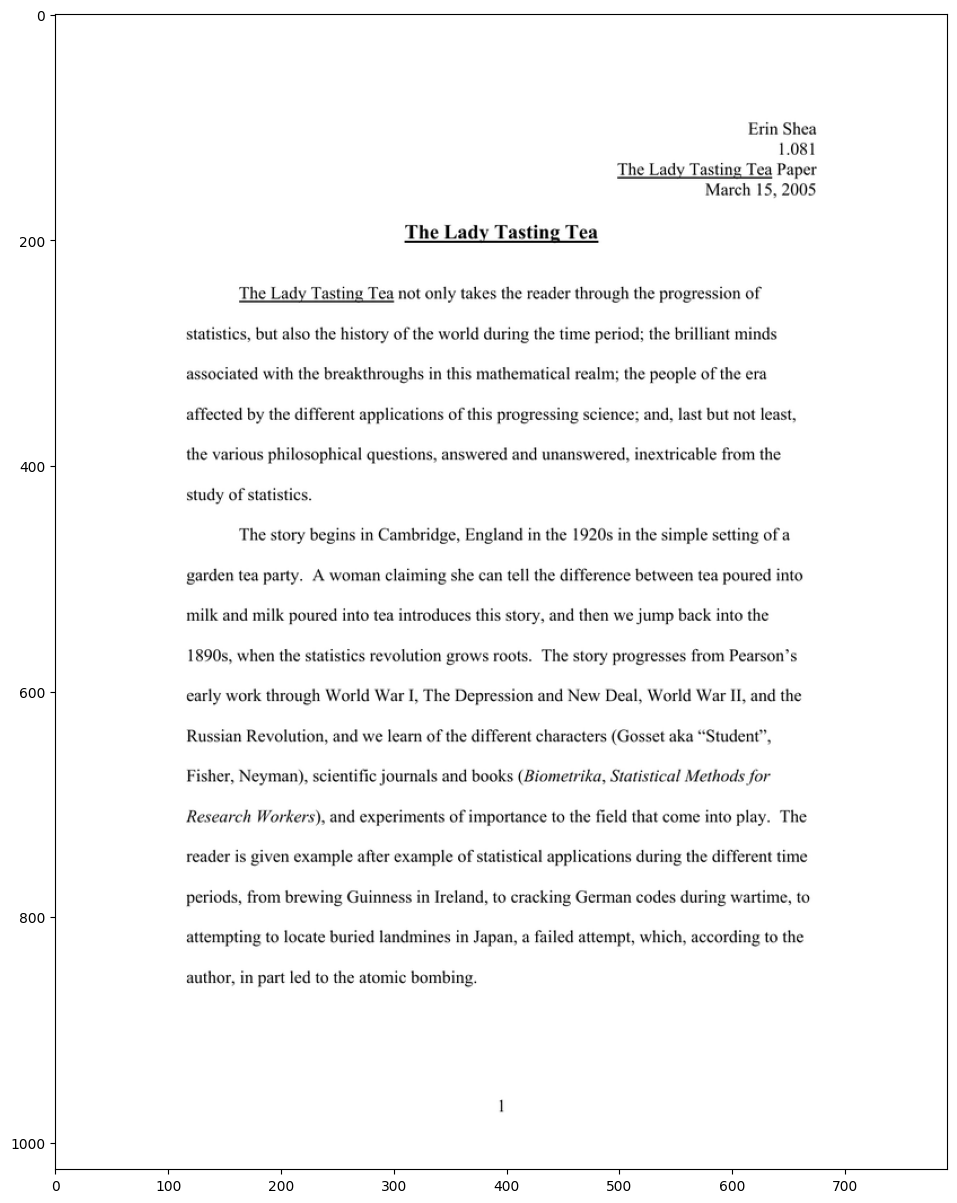

In [82]:
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread('notebooks/lessons/04/the-lady-tasting-tea.png')

plt.rcParams['figure.figsize'] = (15,15)
plt.imshow(img);

**Exercício 8** Conforme aula anterior, utilize um **Reader** do **EasyOCR** para realizar a transcrição dos dados contidos na imagem.

In [113]:
import easyocr


reader = easyocr.Reader(['pt', 'en'], gpu = False)

texto = reader.readtext('notebooks/lessons/04/the-lady-tasting-tea.png')
texto

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[613, 95], [677, 95], [677, 111], [613, 111]],
  'Erin Shea',
  0.849013471150254),
 ([[651, 113], [675, 113], [675, 129], [651, 129]], '081', 0.9864007617224706),
 ([[497, 131], [679, 131], [679, 147], [497, 147]],
  'The Lady Tasting Te Paper',
  0.49577262469602207),
 ([[575, 147], [677, 147], [677, 165], [575, 165]],
  'March 15, 2005',
  0.898486726645517),
 ([[306, 181], [484, 181], [484, 206], [306, 206]],
  'Ihe Lady Tasting Tea',
  0.8040635469902021),
 ([[163, 241], [357, 241], [357, 257], [163, 257]],
  'Thc Lady Tasting Tea not only',
  0.603404967595729),
 ([[395, 240], [629, 240], [629, 260], [395, 260]],
  'the reader through the progression of',
  0.8705638571514693),
 ([[114, 275], [251, 275], [251, 293], [114, 293]],
  'statistics, but also the',
  0.7921520463025263),
 ([[299, 277], [339, 277], [339, 291], [299, 291]],
  'of the',
  0.8281238396517626),
 ([[423, 275], [643, 275], [643, 293], [423, 293]],
  'the time period; the brilliant minds',
  0.66585411677755

In [122]:
" ".join(a[-2] for a in texto)

'Erin Shea 081 The Lady Tasting Te Paper March 15, 2005 Ihe Lady Tasting Tea Thc Lady Tasting Tea not only the reader through the progression of statistics, but also the of the the time period; the brilliant minds associated with the breakthroughs in this mathematical realm; the people of the era affected by the different applications of this progressing science; and, last but not least, the various philosophical questions answered and unanswered, inextricable from the study of statistics The story begins in Cambridge; England in the 1920s in the simple setting of a garden tea party . womnan claiming she can tell the difference between tea poured into milk and milk poured into tea introduces this and then we jump back into the 1890s, when the statistics revolution grows roots. The story progresses from Pearson ` early work through World War L, The Depression and New Deal, World War IL, and the Russian Revolution, and we learn of the different characters (Gosset aka Student"  Fisher, Ne

## Baixando arquivos de texto

Vamos baixar um arquivo TXT do livro *Alice's Adventures in Wonderland*. Aproveitando, iremos configurar um **timeout**, que irá definir o tempo máximo de espera por uma resposta.

Para conseguir o link do livro, acesse https://atd-insper.s3.us-east-2.amazonaws.com/aula04/alice_wonderland.txt

In [91]:
alice_url_txt = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula04/alice_wonderland.txt'

resposta = requests.get(url=alice_url_txt, timeout=1)

resposta

<Response [200]>

Perceba que o argumento de `timeout` está quase zero! Provavelmente a requisição irá falhar. Aumente este valor até obter sucesso. Isto será útil quando você tiver uma tolerância máxima de espera por algum recurso.

Vamos conferir o `content-type`:

In [92]:
resposta.headers['content-type']

'text/plain'

Vejamos o texto retornado:

In [93]:
print(resposta.text)

Alice's Adventures in Wonderland

                ALICE'S ADVENTURES IN WONDERLAND

                          Lewis Carroll

               THE MILLENNIUM FULCRUM EDITION 3.0




                            CHAPTER I

                      Down the Rabbit-Hole


  Alice was beginning to get very tired of sitting by her sister
on the bank, and of having nothing to do:  once or twice she had
peeped into the book her sister was reading, but it had no
pictures or conversations in it, `and what is the use of a book,'
thought Alice `without pictures or conversation?'

  So she was considering in her own mind (as well as she could,
for the hot day made her feel very sleepy and stupid), whether
the pleasure of making a daisy-chain would be worth the trouble
of getting up and picking the daisies, when suddenly a White
Rabbit with pink eyes ran close by her.

  There was nothing so VERY remarkable in that; nor did Alice
think it so VERY much out of the way to hear the Rabbit say to
itself, `Oh d

Então podemos fazer o que quisermos com este texto:
- Remover stopwords
- Quebrar em palavras
- Analisar sentimento das frases
- etc.

In [94]:
resposta.text.split()

["Alice's",
 'Adventures',
 'in',
 'Wonderland',
 "ALICE'S",
 'ADVENTURES',
 'IN',
 'WONDERLAND',
 'Lewis',
 'Carroll',
 'THE',
 'MILLENNIUM',
 'FULCRUM',
 'EDITION',
 '3.0',
 'CHAPTER',
 'I',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank,',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do:',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading,',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it,',
 '`and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 "book,'",
 'thought',
 'Alice',
 '`without',
 'pictures',
 'or',
 "conversation?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(as',
 'well',
 'as',
 'she',
 'could,',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid),',
 'whether',
 'the',
 'pleasure'

## Baixando páginas da Web

A parte realmente legal de trabalharmos com dados da Internet é extrair informações das páginas da Web. Será que podemos utilizar a biblioteca **requests** para baixar conteúdos de páginas Web?

Vamos ver um primeiro exemplo:

**Dica**: copie a URL e cole em seu navegador para ver o conteúdo da página renderizado!

In [105]:
url = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula04/amostra.html'

resposta = requests.get(url = url, )
resposta.encoding = "utf-8"

resposta

<Response [200]>

Conferindo o código de resposta:

In [106]:
print('Código de status da resposta: {}'.format(req.status_code))

Código de status da resposta: 200


E o texto de resposta:

In [107]:
print('Texto de resposta:')
print(resposta.text)

Texto de resposta:
<!DOCTYPE html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>Este é o título da página!</title>
    </head>

    <body>

        <h1>Este é um exemplo de página Web!</h1>

        <p>Estamos utilizando HTML, que é uma linguagem de <b>Marcação</b> de <i>texto</i></p>

        <h2>Este é um cabeçalho</h2>

        <p>E este é um parágrafo.</p>

        <p>Link para o <a href="https://www.google.com">Google</a></p>
    </body>
</html>



Perceberam que alguns caracteres ficaram "estranhos"?!

Vamos conferir o **encoding** utilizado

In [109]:
resposta.encoding

'utf-8'

Vamos alterar o **encoding**

In [ ]:
# Preencha aqui!

e rever o texto de resposta

In [ ]:
print('Texto de resposta:')
# Preencha aqui!

Este conteúdo é um **HTML** (do inglês *HyperText Markup Language*). Na próxima aula, iremos aprender como extrair informações úteis de páginas HTML.

Vamos conferir outra página mais completa?! Faremos a requisição da página de notícias de Ciência da Exame https://exame.com/ciencia/

In [110]:
resposta = requests.get(url = 'https://exame.com/ciencia/')

print(resposta.text)

<!DOCTYPE html><html lang="pt-br"><head><meta charSet="utf-8"/><title>Ciência | Exame | Descobertas da Ciência que estão ampliando o Conhecimento da Humanidade e transformando vidas. ✅ ✚ O canal que você conhece e Confia! ➤ Acesse!</title><meta name="description" content="Descobertas da Ciência que estão ampliando o Conhecimento da Humanidade e transformando vidas. ✅ ✚ O canal que você conhece e Confia! ➤ Acesse!"/><meta property="og:title" content="Ciência | Exame | Descobertas da Ciência que estão ampliando o Conhecimento da Humanidade e transformando vidas. ✅ ✚ O canal que você conhece e Confia! ➤ Acesse!"/><meta property="og:description" content="Ciência | Exame | Descobertas da Ciência que estão ampliando o Conhecimento da Humanidade e transformando vidas. ✅ ✚ O canal que você conhece e Confia! ➤ Acesse!"/><meta property="og:image" content="https://exame.com/images/exame.svg"/><meta property="twitter:image" content="https://exame.com/images/exame.svg"/><meta name="twitter:text:tit

## Outras opções
Algumas opções interessantes de **API** para uso em aplicações.
- Twitter API https://developer.twitter.com/en/docs/twitter-api
- Here Geocoding https://developer.here.com/sign-up e https://developer.here.com/c/geocoding
- OpenAI https://openai.com/blog/introducing-chatgpt-and-whisper-apis